In [1]:
pip install sklearn


Note: you may need to restart the kernel to use updated packages.


In [32]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.datasets import load_wine
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
%matplotlib inline
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import linkage, dendrogram

In [5]:
from sklearn.datasets import load_wine
wine_df = load_wine()
print(wine_df.data)



[[1.423e+01 1.710e+00 2.430e+00 ... 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 ... 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 ... 1.030e+00 3.170e+00 1.185e+03]
 ...
 [1.327e+01 4.280e+00 2.260e+00 ... 5.900e-01 1.560e+00 8.350e+02]
 [1.317e+01 2.590e+00 2.370e+00 ... 6.000e-01 1.620e+00 8.400e+02]
 [1.413e+01 4.100e+00 2.740e+00 ... 6.100e-01 1.600e+00 5.600e+02]]


In [6]:
model=KMeans(n_clusters=5)
model.fit(preprocessing.normalize(wine_df.data))

KMeans(n_clusters=5)

In [7]:
predictions=model.predict(wine_df.data)

In [8]:
print(predictions)

[4 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4 2 4 0 0 4 4 0 0 4 0 0 0 0 0 0 0 4
 0 0 2 4 0 0 4 4 0 0 0 0 0 0 0 0 0 0 0 4 0 0 2 4 1 4 1 3 4 2 2 4 1 4 1 2 4
 4 1 1 1 2 1 3 4 4 2 2 1 2 2 4 4 2 2 2 3 3 2 1 1 4 1 4 2 1 1 4 3 2 2 3 4 2
 3 2 1 1 1 2 3 1 2 2 3 3 1 1 1 1 1 3 4 2 1 2 2 4 4 4 2 2 2 2 4 2 2 4 4 1 4
 4 1 1 1 3 4 2 4 2 4 4 4 2 2 2 2 4 2 2 4 4 2 2 2 4 4 4 4 4 2]


In [9]:
cluster_0=wine_df.data[predictions==0]
cluster_1=wine_df.data[predictions==1]
cluster_2=wine_df.data[predictions==2]
cluster_3=wine_df.data[predictions==3]
cluster_4=wine_df.data[predictions==4]

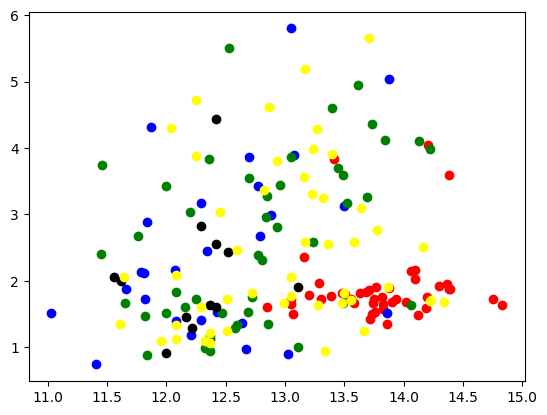

In [10]:
plt.scatter(cluster_0[:,0],cluster_0[:,1],color='red')
plt.scatter(cluster_1[:,0],cluster_1[:,1],color='blue')
plt.scatter(cluster_2[:,0],cluster_2[:,1],color='green')
plt.scatter(cluster_3[:,0],cluster_3[:,1],color='black')
plt.scatter(cluster_4[:,0],cluster_4[:,1],color='yellow')

In [29]:
dbscan=DBSCAN(eps=0.3,min_samples=3)
dbscan.fit(preprocessing.normalize(wine_df.data))


DBSCAN(eps=0.3, min_samples=3)

In [30]:
pca=PCA(n_components=2).fit(preprocessing.normalize(wine_df.data))
pca_2d=pca.transform(preprocessing.normalize(wine_df.data))

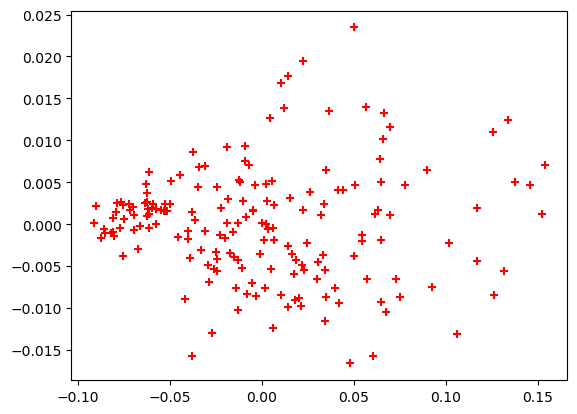

In [35]:
for i in range(0,pca_2d.shape[0]):
    if dbscan.labels_[i]==0:
        c1=plt.scatter(pca_2d[i,0],pca_2d[i,1],c='r',marker='+')
    elif dbscan.labels_[i]==1:
        c2=plt.scatter(pca_2d[i,0],pca_2d[i,1],c='b',marker='o')
    elif dbscan.labels_[i]==2:
        c3=plt.scatter(pca_2d[i,0],pca_2d[i,1],c='g',marker='*')
    elif dbscan.labels_[i]==-1:
        c4=plt.scatter(pca_2d[i,0],pca_2d[i,1],c='y',marker='d')

In [ ]:
#Не розділилось на кластери на візуалізації, щось треба міняти

In [51]:
complete_clustering = linkage(wine_df.data, method="complete", metric="euclidean")
average_clustering = linkage(wine_df.data, method="average", metric="euclidean")
single_clustering = linkage(wine_df.data, method="single", metric="euclidean")

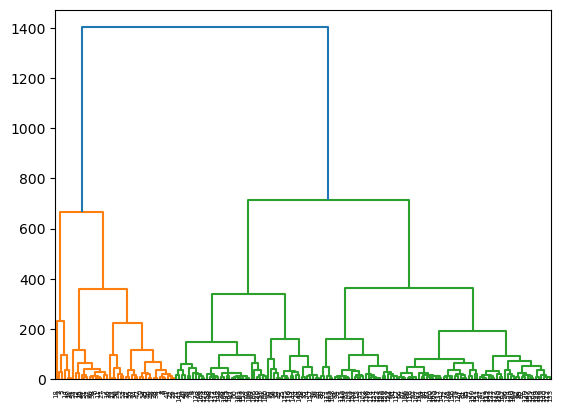

In [55]:
dendrogram(complete_clustering)
plt.show()

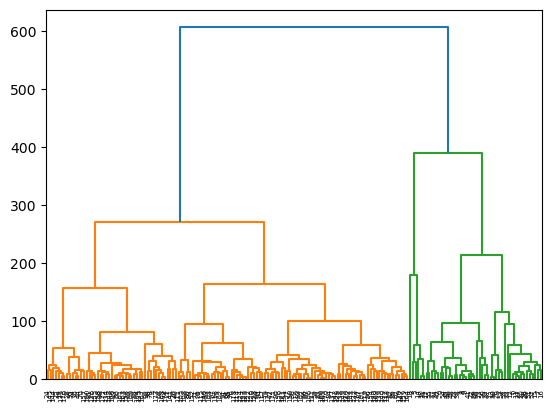

In [38]:
dendrogram(average_clustering)
plt.show()

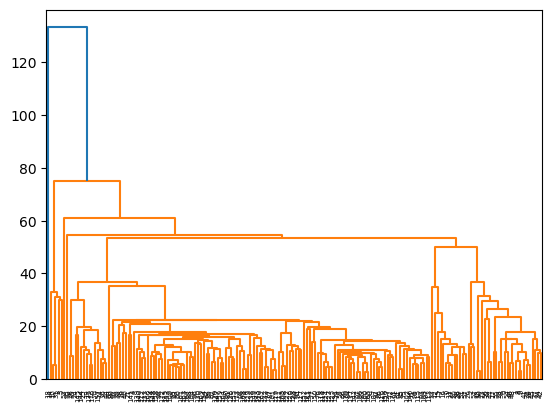

In [56]:
dendrogram(single_clustering)
plt.show()